In [2]:
from __future__ import division
from mpl_toolkits.basemap import Basemap
import pandas as pd
from itertools import groupby
import operator
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import numpy as np
import seaborn as sns
import math

In [15]:
data = pd.read_csv("IMR37.csv")

In [16]:
data.shape

(35, 43)

In [17]:
# group the data state-wise
data = pd.read_csv("IMR.csv")
states_group = data.groupby(by = "State name")

# List for storing tuples which contain state-name and its corresponding IMR
IMR_rate = [] 
IMR_rate = [('ANDAMAN AND NICOBAR ISLANDS', 24), ('ANDHRA PRADESH', 40), ('ARUNACHAL PRADESH', 32), ('ASSAM', 54), ('BIHAR', 42), ('CHANDIGARH', 21), ('CHHATTISGARH', 46), ('DADRA AND NAGAR HAVELI', 31), ('DAMAN AND DIU', 20), ('GOA', 9), ('GUJARAT', 36), ('HARYANA', 41), ('HIMACHAL PRADESH', 35), ('JAMMU AND KASHMIR', 37), ('JHARKHAND', 37), ('KARNATAKA', 31), ('KERALA', 12), ('LAKSHADWEEP', 24), ('MADHYA PRADESH', 54), ('MAHARASHTRA', 24), ('MANIPUR', 10), ('MEGHALAYA', 47), ('MIZORAM', 35), ('NAGALAND', 18), ('NCT OF DELHI', 24), ('ORISSA', 51), ('PONDICHERRY', 17), ('PUNJAB', 26), ('RAJASTHAN', 47), ('SIKKIM', 22), ('TAMIL NADU', 21), ('TRIPURA', 26), ('UTTAR PRADESH', 50), ('UTTARAKHAND', 32), ('WEST BENGAL', 31)]
    
print ("State Wise IMR : \n")
print (IMR_rate)

State Wise IMR : 

[('ANDAMAN AND NICOBAR ISLANDS', 24), ('ANDHRA PRADESH', 40), ('ARUNACHAL PRADESH', 32), ('ASSAM', 54), ('BIHAR', 42), ('CHANDIGARH', 21), ('CHHATTISGARH', 46), ('DADRA AND NAGAR HAVELI', 31), ('DAMAN AND DIU', 20), ('GOA', 9), ('GUJARAT', 36), ('HARYANA', 41), ('HIMACHAL PRADESH', 35), ('JAMMU AND KASHMIR', 37), ('JHARKHAND', 37), ('KARNATAKA', 31), ('KERALA', 12), ('LAKSHADWEEP', 24), ('MADHYA PRADESH', 54), ('MAHARASHTRA', 24), ('MANIPUR', 10), ('MEGHALAYA', 47), ('MIZORAM', 35), ('NAGALAND', 18), ('NCT OF DELHI', 24), ('ORISSA', 51), ('PONDICHERRY', 17), ('PUNJAB', 26), ('RAJASTHAN', 47), ('SIKKIM', 22), ('TAMIL NADU', 21), ('TRIPURA', 26), ('UTTAR PRADESH', 50), ('UTTARAKHAND', 32), ('WEST BENGAL', 31)]


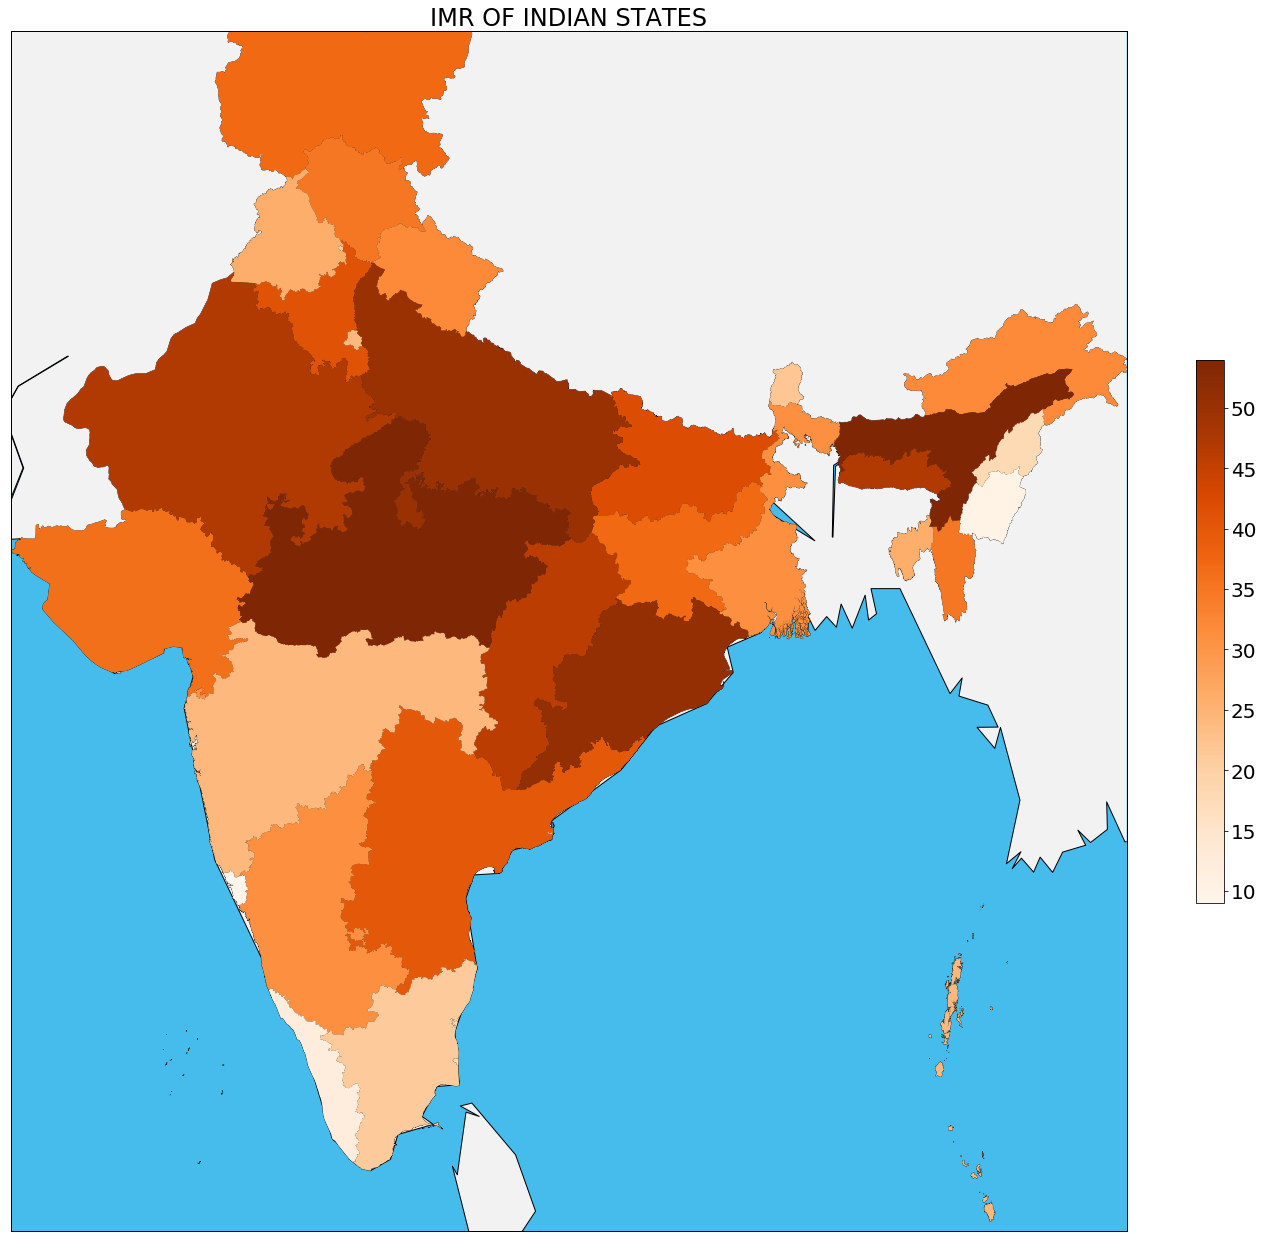

In [18]:
'''
STEP 2 : CREATING A MAP
'''
# Create figure 
fig, ax = plt.subplots()
# Create a map with the coordinates determined by the Bounding Box tool
m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)
# Draw map boundary and set the color
m.drawmapboundary(fill_color='#46bcec')
# Fill continents and lakes
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
# Draw coast lines
m.drawcoastlines()

'''
STEP 3 : USING SHAPEFILES FOR DRAWING STATES 
'''
# Load the shape file of India
m.readshapefile("INDIA","INDIA")


'''
STEP 4 : CREATING A DATAFRAME MAPPING SHAPES TO STATE NAME AND IMR
'''
IMR = []

for state_info in m.INDIA_info:
    state = state_info['ST_NAME'].upper()
    rate = 0
    for x in IMR_rate:
        if x[0] == state:
            rate = x[1]
            break
    IMR.append(rate)            
    
  
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.INDIA],
        'area': [area['ST_NAME'] for area in m.INDIA_info],
        'IMR' : IMR
    })

'''
STEP 5 : USING DATA TO COLOR AREAS
'''
# Get all the shapes
shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
# Create a colormap
cmap = plt.get_cmap('Oranges')   
# Create a patch collection. Create patches on the top of the map, not beneath it (zorder=2)
pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
# Set color according to the literacy rate of the state
pc.set_facecolor(cmap(norm(df_poly['IMR'].fillna(0).values)))
ax.add_collection(pc)

# Create a mapper to map color intensities to values
mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(IMR)
plt.colorbar(mapper, shrink=0.4)
# Set title for the plot
ax.set_title("IMR OF INDIAN STATES")
# Change plot size and font size
plt.rcParams['figure.figsize'] = (25,25)
plt.rcParams.update({'font.size': 20})
plt.show()